[View in Colaboratory](https://colab.research.google.com/github/McKenzyPG/edu_cm_dl/blob/master/pyTorch_practice_rec2_ipynb.ipynb)

In [1]:
import torch
print(torch.__version__)

0.4.0


In [2]:
print(torch.cuda.is_available())

True


In [3]:
# Create uninitialized tensor
x = torch.FloatTensor(2,3)
print(x)
# Initialize to zeros
x.zero_()
print(x)

tensor(1.00000e-36 *
       [[ 1.0585,  0.0000,  0.0000],
        [ 0.0000,     nan,  0.0000]])
tensor([[ 0.,  0.,  0.],
        [ 0.,  0.,  0.]])


In [4]:
import numpy as np
import torch.nn as nn
# Create from numpy array (seed for repeatability)
np.random.seed(123)
np_array = np.random.random((2,3))
print(torch.FloatTensor(np_array))
print(torch.from_numpy(np_array))

tensor([[ 0.6965,  0.2861,  0.2269],
        [ 0.5513,  0.7195,  0.4231]])
tensor([[ 0.6965,  0.2861,  0.2269],
        [ 0.5513,  0.7195,  0.4231]], dtype=torch.float64)


In [5]:
print(torch.__version__)

0.4.0


In [6]:
# Create random tensor (seed for repeatability)
torch.manual_seed(123)
x=torch.randn(2,3)
print(x)
# export to numpy array
x_np = x.numpy()
print(x_np)

tensor([[-0.1115,  0.1204, -0.3696],
        [-0.2404, -1.1969,  0.2093]])
[[-0.11146712  0.12036294 -0.3696345 ]
 [-0.24041797 -1.1969243   0.20926936]]


In [7]:
# special tensors (see documentation)
print(torch.eye(3))
print(torch.ones(2,3))
print(torch.zeros(2,3))
print(torch.arange(0,3))

tensor([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]])
tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.]])
tensor([[ 0.,  0.,  0.],
        [ 0.,  0.,  0.]])
tensor([ 0.,  1.,  2.])


In [8]:
x=torch.FloatTensor(3,4)
print(x.size())
print(x.type())

torch.Size([3, 4])
torch.FloatTensor


In [9]:
x = torch.arange(0,5).float()
print(torch.sum(x))
print(torch.sum(torch.exp(x)))
print(torch.mean(x))

tensor(10.)
tensor(85.7910)
tensor(2.)


In [10]:
x = torch.rand(3,2)
print(x)
print(x[1,:])

tensor([[ 0.0756,  0.1966],
        [ 0.3164,  0.4017],
        [ 0.1186,  0.8274]])
tensor([ 0.3164,  0.4017])


In [12]:
# create a tensor
x = torch.rand(3,2)
print(x)
a = x.cpu()
# copy to GPU
y = a.cuda()
print(y)
# copy back to CPU
z = y.cpu()
print(z)
# get CPU tensor as numpy array
print(z.numpy())
# cannot get GPU tensor as numpy array directly
try:
  print(y.numpy())
except TypeError as e:
  print(e)

tensor([[ 0.3821,  0.6605],
        [ 0.8536,  0.5932],
        [ 0.6367,  0.9826]])
tensor([[ 0.3821,  0.6605],
        [ 0.8536,  0.5932],
        [ 0.6367,  0.9826]], device='cuda:0')
tensor([[ 0.3821,  0.6605],
        [ 0.8536,  0.5932],
        [ 0.6367,  0.9826]])
[[0.38208443 0.66049385]
 [0.8535718  0.593153  ]
 [0.63672537 0.98262936]]
can't convert CUDA tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.


In [13]:
print(torch.__version__)

0.4.0


In [14]:
x = torch.rand(3,5)  # CPU tensor
y = torch.rand(5,4).cuda()  # GPU tensor
try:
  torch.mm(x,y)  # Operation between CPU and GPU fails
except RuntimeError as e:
  print(e)

Expected object of type torch.FloatTensor but found type torch.cuda.FloatTensor for argument #2 'mat2'


In [0]:
# Put tensor on CUDA if available
x = torch.rand(3,2)
if torch.cuda.is_available():
  x = x.cuda()

# Do some calculations
y = x ** 2 

# Copy to CPU if on GPU
if y.is_cuda:
  y = y.cpu()

In [16]:
x1 = torch.rand(3,2)
x2 = x1.new(1,2)  # create cpu tensor
print(x2)
x1 = torch.rand(3,2).cuda()
x2 = x1.new(1,2)  # create cuda tensor
print(x2)

tensor([[ 8.3387e-33,  4.5869e-41]])
tensor([[ 0.0090,  0.3351]], device='cuda:0')


In [17]:
from timeit import timeit
# Create random data
x = torch.rand(1000,64)
y = torch.rand(64,32)
number = 10000  # number of iterations

def square():
  z=torch.mm(x, y) # dot product (mm=matrix multiplication)

# Time CPU
print('CPU: {}ms'.format(timeit(square, number=number)*1000))
# Time GPU
x, y = x.cuda(), y.cuda()
print('GPU: {}ms'.format(timeit(square, number=number)*1000))

CPU: 787.3146570000245ms
GPU: 348.83319700020365ms


In [18]:
# Create differentiable tensor
x = torch.tensor(torch.arange(0,4).float(),requires_grad=True)
z = x ** 2
b = torch.zeros(4,requires_grad=True)
y = 5*z+x+b
# Calculate gradient (dy/dx=10x+1,dy/db=1)
y.sum().backward()
# Print values
print(y)
print(x.grad)
print(b.grad)
print(y.grad)

tensor([  0.,   6.,  22.,  48.])
tensor([  1.,  11.,  21.,  31.])
tensor([ 1.,  1.,  1.,  1.])
None


In [19]:
# Create a variable
x=torch.tensor(torch.arange(0,4).float(), requires_grad=True)
# Differentiate
torch.sum(x**2).backward()
print(x.grad)
# Differentiate again (accumulates gradient)
torch.sum(x**2).backward()
print(x.grad)
# Zero gradient before differentiating
x.grad.data.zero_()
torch.sum(x**2).backward()
print(x.grad)

tensor([ 0.,  2.,  4.,  6.])
tensor([  0.,   4.,   8.,  12.])
tensor([ 0.,  2.,  4.,  6.])


In [20]:
x=torch.tensor(torch.arange(0,4).float(), requires_grad=True)
x.numpy() # raises an exception

RuntimeError: ignored

In [21]:
x=torch.tensor(torch.arange(0,4).float(), requires_grad=True)
y=x**2
z=y**2
z.detach().numpy()

array([ 0.,  1., 16., 81.], dtype=float32)

In [0]:
net = torch.nn.Linear(4,2)

In [23]:
x = torch.arange(0,4).float()
y = net.forward(x)
y = net(x) # Alternatively
print(y)

tensor([-0.3535,  0.0932])


In [24]:
x = torch.arange(0,32).float()
net = torch.nn.Linear(32,10)
y = net(x)
print(y)

tensor([ -1.2053, -11.6210,  -7.5367,   9.1668, -14.7067, -13.1726,
         11.5341,   3.7762,  23.3194,  -4.3059])


In [0]:
# create a simple sequential network (`nn.Module` object) from layers (other `nn.Module` objects).
# Here a MLP with 2 layers and sigmoid activation.
net = torch.nn.Sequential(
    torch.nn.Linear(32,128),
    torch.nn.Sigmoid(),
    torch.nn.Linear(128,10))

In [0]:
# create a more customizable network module (equivalent here)
class MyNetwork(torch.nn.Module):
    # you can use the layer sizes as initialization arguments if you want to
    def __init__(self,input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = torch.nn.Linear(input_size,hidden_size)
        self.layer2 = torch.nn.Sigmoid()
        self.layer3 = torch.nn.Linear(hidden_size,output_size)

    def forward(self, input_val):
        h = input_val
        h = self.layer1(h)
        h = self.layer2(h)
        h = self.layer3(h)
        return h

net = MyNetwork(32,128,10)

In [27]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[-0.0066, -0.0284, -0.0221,  ..., -0.0455, -0.0637, -0.1313],
        [ 0.1603, -0.0496, -0.0025,  ..., -0.1422,  0.1650, -0.0092],
        [ 0.1334, -0.0589, -0.1393,  ..., -0.0148, -0.0889,  0.1124],
        ...,
        [-0.0417,  0.0338, -0.1262,  ...,  0.0331, -0.0907,  0.0445],
        [-0.1049,  0.0290, -0.0528,  ...,  0.0237,  0.0159,  0.1424],
        [ 0.1321, -0.1763,  0.0188,  ..., -0.0507,  0.1083, -0.1162]])
Parameter containing:
tensor([-0.0565, -0.0122,  0.0131,  0.0323, -0.1086,  0.1145,  0.1153,
         0.1578, -0.1741, -0.0879, -0.1259,  0.1038, -0.1328,  0.1236,
         0.0834,  0.1593,  0.1020, -0.1573, -0.0994, -0.0793,  0.0433,
        -0.0659, -0.0446, -0.1097, -0.0849, -0.1697, -0.1460,  0.1269,
         0.0598,  0.0937,  0.1518, -0.1610,  0.0869, -0.1608, -0.1033,
         0.0641, -0.0692, -0.1414,  0.1670, -0.0994,  0.0192, -0.0146,
        -0.0799, -0.0333,  0.1528, -0.0130,  0.1032,  0.1355, -0.1415,
        -0.1337,  0.0166,

In [0]:
class MyNetworkWithParams(nn.Module):
    def __init__(self,input_size, hidden_size, output_size):
        super(MyNetworkWithParams,self).__init__()
        self.layer1_weights = nn.Parameter(torch.randn(input_size,hidden_size))
        self.layer1_bias = nn.Parameter(torch.randn(hidden_size))
        self.layer2_weights = nn.Parameter(torch.randn(hidden_size,output_size))
        self.layer2_bias = nn.Parameter(torch.randn(output_size))
        
    def forward(self,x):
        h1 = torch.matmul(x,self.layer1_weights) + self.layer1_bias
        h1_act = torch.max(h1, torch.zeros(h1.size())) # ReLU
        output = torch.matmul(h1_act,self.layer2_weights) + self.layer2_bias
        return output

net = MyNetworkWithParams(32,128,10)

In [0]:
net = MyNetwork(32,128,10)

In [30]:
x = torch.tensor([np.arange(32), np.zeros(32),np.ones(32)]).float()
y = torch.tensor([0,3,9])
criterion = nn.CrossEntropyLoss()

output = net(x)
loss = criterion(output,y)
print(loss)

tensor(2.3711)


In [31]:
# equivalent
criterion2 = nn.NLLLoss()
sf = nn.LogSoftmax()
output = net(x)
loss = criterion(sf(output),y)
loss

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  after removing the cwd from sys.path.


tensor(2.3711)

In [32]:
loss.backward()

# Check that the parameters now have gradients
for param in net.parameters():
    print(param.grad)

tensor([[ 2.8298e-03,  2.8301e-03,  2.8303e-03,  ...,  2.8372e-03,
          2.8374e-03,  2.8377e-03],
        [-3.5337e-03, -3.5337e-03, -3.5337e-03,  ..., -3.5337e-03,
         -3.5337e-03, -3.5337e-03],
        [-1.6828e-05, -3.1524e-04, -6.1366e-04,  ..., -8.6709e-03,
         -8.9693e-03, -9.2677e-03],
        ...,
        [-5.9205e-03, -5.9166e-03, -5.9127e-03,  ..., -5.8069e-03,
         -5.8030e-03, -5.7991e-03],
        [-6.7343e-03, -5.0284e-03, -3.3226e-03,  ...,  4.2735e-02,
          4.4441e-02,  4.6147e-02],
        [ 6.9405e-03,  6.9399e-03,  6.9393e-03,  ...,  6.9234e-03,
          6.9228e-03,  6.9222e-03]])
tensor(1.00000e-02 *
       [ 0.0401, -0.9375, -0.2678,  0.1842, -0.0110,  0.4472, -0.4023,
        -1.3054, -0.7353,  0.1489,  0.6351,  0.8315,  0.0682, -0.1357,
         0.1471, -0.4267, -0.2310, -0.0537,  0.0924,  0.1252, -0.3606,
        -0.6016,  0.0696, -0.4505,  0.1406, -0.0732,  0.3375,  0.4361,
         0.2823,  0.2637, -0.3212, -0.3062, -0.0706, -0.1103,  

In [33]:
# if I forward prop and backward prop again, gradients accumulate :
output = net(x)
loss = criterion(output,y)
loss.backward()
for param in net.parameters():
    print(param.grad)

# you can remove this behavior by reinitializing the gradients in your network parameters :
net.zero_grad()
output = net(x)
loss = criterion(output,y)
loss.backward()
for param in net.parameters():
    print(param.grad)

tensor([[ 0.0057,  0.0057,  0.0057,  ...,  0.0057,  0.0057,  0.0057],
        [-0.0071, -0.0071, -0.0071,  ..., -0.0071, -0.0071, -0.0071],
        [-0.0000, -0.0006, -0.0012,  ..., -0.0173, -0.0179, -0.0185],
        ...,
        [-0.0118, -0.0118, -0.0118,  ..., -0.0116, -0.0116, -0.0116],
        [-0.0135, -0.0101, -0.0066,  ...,  0.0855,  0.0889,  0.0923],
        [ 0.0139,  0.0139,  0.0139,  ...,  0.0138,  0.0138,  0.0138]])
tensor(1.00000e-02 *
       [ 0.0802, -1.8751, -0.5357,  0.3685, -0.0219,  0.8943, -0.8046,
        -2.6108, -1.4707,  0.2978,  1.2703,  1.6629,  0.1363, -0.2715,
         0.2941, -0.8534, -0.4620, -0.1073,  0.1849,  0.2503, -0.7212,
        -1.2031,  0.1391, -0.9011,  0.2812, -0.1465,  0.6749,  0.8722,
         0.5647,  0.5274, -0.6425, -0.6123, -0.1411, -0.2206,  1.3963,
        -0.0829,  0.9119, -0.8540, -0.4071, -1.8594,  2.3011,  0.2701,
         1.1908,  0.0576, -0.0790, -1.4280, -1.1190, -0.4816,  0.1697,
         0.2649,  0.5480,  1.5243,  0.7657, -1.7

In [34]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

print("Parameters before gradient descent :")
for param in net.parameters():
    print(param)

optimizer.step()

print("Parameters after gradient descent :")
for param in net.parameters():
    print(param)

Parameters before gradient descent :
Parameter containing:
tensor([[-0.0257, -0.0565, -0.1145,  ...,  0.0207, -0.0604, -0.1375],
        [-0.1278, -0.1447,  0.0621,  ..., -0.1384, -0.0902,  0.0665],
        [ 0.1418,  0.1006, -0.1525,  ...,  0.0008, -0.0297, -0.1108],
        ...,
        [-0.1192, -0.0836,  0.1603,  ...,  0.1452, -0.0735,  0.1366],
        [-0.0811, -0.0257,  0.0106,  ..., -0.0972, -0.0423,  0.0740],
        [ 0.0780,  0.0622,  0.0414,  ...,  0.1607, -0.1137, -0.0695]])
Parameter containing:
tensor([ 0.0403,  0.0866, -0.0381, -0.0676, -0.1215,  0.1454,  0.1548,
         0.0473,  0.0093, -0.0777,  0.1307,  0.0738,  0.0428, -0.0367,
         0.1464,  0.1611,  0.0209,  0.0431, -0.1234, -0.0167,  0.1560,
        -0.0413, -0.1622,  0.1103, -0.0161, -0.0406, -0.0504,  0.0779,
         0.0155,  0.0946,  0.0614, -0.1548,  0.0500, -0.1348,  0.0805,
        -0.0520,  0.0702, -0.1589,  0.0230,  0.1121, -0.0054, -0.0841,
        -0.0954,  0.1534,  0.1668,  0.0355, -0.1320,  0.075

In [35]:
# In a training loop, we should perform many GD iterations.
n_iter = 1000
for i in range(n_iter):
    optimizer.zero_grad() # equivalent to net.zero_grad()
    output = net(x)
    loss = criterion(output,y)
    loss.backward()
    optimizer.step()
    print(loss)

tensor(2.2448)
tensor(2.1325)
tensor(2.0309)
tensor(1.9385)
tensor(1.8542)
tensor(1.7770)
tensor(1.7062)
tensor(1.6413)
tensor(1.5820)
tensor(1.5278)
tensor(1.4779)
tensor(1.4319)
tensor(1.3893)
tensor(1.3498)
tensor(1.3130)
tensor(1.2786)
tensor(1.2464)
tensor(1.2162)
tensor(1.1878)
tensor(1.1611)
tensor(1.1358)
tensor(1.1119)
tensor(1.0891)
tensor(1.0675)
tensor(1.0467)
tensor(1.0268)
tensor(1.0077)
tensor(0.9894)
tensor(0.9718)
tensor(0.9550)
tensor(0.9389)
tensor(0.9236)
tensor(0.9090)
tensor(0.8952)
tensor(0.8821)
tensor(0.8696)
tensor(0.8577)
tensor(0.8464)
tensor(0.8355)
tensor(0.8251)
tensor(0.8151)
tensor(0.8055)
tensor(0.7962)
tensor(0.7873)
tensor(0.7787)
tensor(0.7703)
tensor(0.7622)
tensor(0.7544)
tensor(0.7469)
tensor(0.7395)
tensor(0.7324)
tensor(0.7255)
tensor(0.7187)
tensor(0.7122)
tensor(0.7059)
tensor(0.6997)
tensor(0.6936)
tensor(0.6878)
tensor(0.6820)
tensor(0.6765)
tensor(0.6710)
tensor(0.6657)
tensor(0.6605)
tensor(0.6554)
tensor(0.6505)
tensor(0.6456)
tensor(0.6

In [36]:
output = net(x)
print(output)
print(y)

tensor([[ 7.6518, -2.2572, -2.0078,  0.7327, -1.9824, -2.1911, -1.9617,
         -1.5904, -1.6133,  3.7098],
        [ 0.3031, -1.3820, -1.6498,  5.7447, -1.5390, -1.6038, -1.5714,
         -1.7296, -1.6747,  3.1288],
        [ 1.7986, -1.6997, -1.7378,  2.9429, -1.6754, -1.7895, -1.6576,
         -1.6598, -1.6758,  5.6404]])
tensor([ 0,  3,  9])


In [37]:
# get dictionary of keys to weights using `state_dict`
net = torch.nn.Sequential(
    torch.nn.Linear(28*28,256),
    torch.nn.Sigmoid(),
    torch.nn.Linear(256,10))
print(net.state_dict().keys())

odict_keys(['0.weight', '0.bias', '2.weight', '2.bias'])


In [0]:
# save a dictionary
torch.save(net.state_dict(),'test.t7')
# load a dictionary
net.load_state_dict(torch.load('test.t7'))

In [39]:
net = nn.Linear(4,2)
x = torch.tensor([1,2,3,4])
y = net(x)
print(y)

RuntimeError: ignored

In [0]:
x = x.float()
x = torch.tensor([1.,2.,3.,4.])

In [41]:
x = 2* torch.ones(2,2)
y = 3* torch.ones(2,2)
print(x * y)
print(x.matmul(y))

tensor([[ 6.,  6.],
        [ 6.,  6.]])
tensor([[ 12.,  12.],
        [ 12.,  12.]])


In [42]:
x = torch.ones(4,5).float()
y = torch.arange(5).float()
print(x+y)
y = torch.arange(4).float().view(-1,1)
print(x+y)
y = torch.arange(4).float()
print(x+y) # exception

tensor([[ 1.,  2.,  3.,  4.,  5.],
        [ 1.,  2.,  3.,  4.,  5.],
        [ 1.,  2.,  3.,  4.,  5.],
        [ 1.,  2.,  3.,  4.,  5.]])
tensor([[ 1.,  1.,  1.,  1.,  1.],
        [ 2.,  2.,  2.,  2.,  2.],
        [ 3.,  3.,  3.,  3.,  3.],
        [ 4.,  4.,  4.,  4.,  4.]])


RuntimeError: ignored

In [43]:
x = torch.tensor([[1,2,3],[4,5,6]])
print(x)
print(x.t())
print(x.view(3,2))

tensor([[ 1,  2,  3],
        [ 4,  5,  6]])
tensor([[ 1,  4],
        [ 2,  5],
        [ 3,  6]])
tensor([[ 1,  2],
        [ 3,  4],
        [ 5,  6]])


In [44]:
def get_layer():
    return nn.Sequential(nn.Linear(2048,2048),nn.ReLU())
def get_layers(n):
    return nn.Sequential(*[get_layer() for i in range(n)])
net = nn.Sequential(get_layers(100),
                   nn.Linear(2048,120))
x = torch.rand(1024,2048)
y = torch.zeros(1024).long()
net=net.cuda()
x=x.cuda()
y=y.cuda()
crit=nn.CrossEntropyLoss()
out = net(x)
loss = crit(out,y)
loss.backward()
print(loss)

tensor(4.7652, device='cuda:0')


In [0]:
class MyNet(nn.Module):
    def __init__(self,n_hidden_layers):
        super(MyNet,self).__init__()
        self.n_hidden_layers=n_hidden_layers
        self.final_layer = nn.Linear(128,10)
        self.act = nn.ReLU()
        self.hidden = []
        for i in range(n_hidden_layers):
            self.hidden.append(nn.Linear(128,128))
    
            
    def forward(self,x):
        h = x
        for i in range(self.n_hidden_layers):
            h = self.hidden[i](h)
            h = self.act(h)
        out = self.final_layer(h)
        return out

In [0]:
class MyNet(nn.Module):
    def __init__(self,n_hidden_layers):
        super(MyNet,self).__init__()
        self.n_hidden_layers=n_hidden_layers
        self.final_layer = nn.Linear(128,10)
        self.act = nn.ReLU()
        self.hidden = []
        for i in range(n_hidden_layers):
            self.hidden.append(nn.Linear(128,128))
        self.hidden = nn.ModuleList(self.hidden)
            
    def forward(self,x):
        h = x
        for i in range(self.n_hidden_layers):
            h = self.hidden[i](h)
            h = self.act(h)
        out = self.final_layer(h)
        return out

In [0]:
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [0]:
def sample_points(n):
    # returns (X,Y), where X of shape (n,2) is the numpy array of points and Y is the (n) array of classes
    
    radius = np.random.uniform(low=0,high=2,size=n).reshape(-1,1) # uniform radius between 0 and 2
    angle = np.random.uniform(low=0,high=2*np.pi,size=n).reshape(-1,1) # uniform angle
    x1 = radius*np.cos(angle)
    x2=radius*np.sin(angle)
    y = (radius<1).astype(int).reshape(-1)
    x = np.concatenate([x1,x2],axis=1)
    return x,y

In [49]:

# Generate the data
trainx,trainy = sample_points(10000)
valx,valy = sample_points(500)
testx,testy = sample_points(500)

print(trainx.shape,trainy.shape)

(10000, 2) (10000,)


In [0]:
def generate_single_hidden_MLP(n_hidden_neurons):
    return nn.Sequential(nn.Linear(2,n_hidden_neurons),nn.ReLU(),nn.Linear(n_hidden_neurons,2))
model1 = generate_single_hidden_MLP(6)

In [51]:
trainx = torch.from_numpy(trainx).float()
valx = torch.from_numpy(valx).float()
testx = torch.from_numpy(testx).float()
trainy = torch.from_numpy(trainy)
valy = torch.from_numpy(valy)
testy = torch.from_numpy(testy)
print(trainx.type(),trainy.type())

torch.FloatTensor torch.LongTensor


In [0]:
def training_routine(net,dataset,n_iters,gpu):
    # organize the data
    train_data,train_labels,val_data,val_labels = dataset
    
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(),lr=0.01)
    
    # use the flag
    if gpu:
        train_data,train_labels = train_data.cuda(),train_labels.cuda()
        val_data,val_labels = val_data.cuda(),val_labels.cuda()
        net = net.cuda() # the network parameters also need to be on the gpu !
        print("Using GPU")
    else:
        print("Using CPU")
    for i in range(n_iters):
        # forward pass
        train_output = net(train_data)
        train_loss = criterion(train_output,train_labels)
        # backward pass and optimization
        train_loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        # Once every 100 iterations, print statistics
        if i%100==0:
            print("At iteration",i)
            # compute the accuracy of the prediction
            train_prediction = train_output.cpu().detach().argmax(dim=1)
            train_accuracy = (train_prediction.numpy()==train_labels.numpy()).mean() 
            # Now for the validation set
            val_output = net(val_data)
            val_loss = criterion(val_output,val_labels)
            # compute the accuracy of the prediction
            val_prediction = val_output.cpu().detach().argmax(dim=1)
            val_accuracy = (val_prediction.numpy()==val_labels.numpy()).mean() 
            print("Training loss :",train_loss.cpu().detach().numpy())
            print("Training accuracy :",train_accuracy)
            print("Validation loss :",val_loss.cpu().detach().numpy())
            print("Validation accuracy :",val_accuracy)
    
    net = net.cpu()

In [0]:
dataset = trainx,trainy,valx,valy

In [54]:
gpu = False
gpu = gpu and torch.cuda.is_available() # to know if you actually can use the GPU
begin = time.time()
training_routine(model1,dataset,10000,gpu)
end=time.time()

Using CPU
At iteration 0
Training loss : 0.72586685
Training accuracy : 0.4965
Validation loss : 0.7369952
Validation accuracy : 0.472
At iteration 100
Training loss : 0.6646706
Training accuracy : 0.6647
Validation loss : 0.66756636
Validation accuracy : 0.658
At iteration 200
Training loss : 0.6423394
Training accuracy : 0.7952
Validation loss : 0.6434726
Validation accuracy : 0.798
At iteration 300
Training loss : 0.62422746
Training accuracy : 0.8025
Validation loss : 0.62552905
Validation accuracy : 0.794
At iteration 400
Training loss : 0.6059362
Training accuracy : 0.806
Validation loss : 0.60770285
Validation accuracy : 0.798
At iteration 500
Training loss : 0.5869266
Training accuracy : 0.816
Validation loss : 0.58919376
Validation accuracy : 0.806
At iteration 600
Training loss : 0.5671713
Training accuracy : 0.8357
Validation loss : 0.57004344
Validation accuracy : 0.82
At iteration 700
Training loss : 0.5466578
Training accuracy : 0.8529
Validation loss : 0.5502337
Validati

In [55]:
print("Training time :",end-begin)

Training time : 30.61652970314026


In [56]:
# Let's try with 3 hidden neurons.
model2 = generate_single_hidden_MLP(3) 
training_routine(model2,dataset,10000,gpu)

Using CPU
At iteration 0
Training loss : 0.75298476
Training accuracy : 0.5849
Validation loss : 0.76475996
Validation accuracy : 0.566
At iteration 100
Training loss : 0.6855748
Training accuracy : 0.6391
Validation loss : 0.6891135
Validation accuracy : 0.642
At iteration 200
Training loss : 0.66768086
Training accuracy : 0.6178
Validation loss : 0.66742885
Validation accuracy : 0.624
At iteration 300
Training loss : 0.65896976
Training accuracy : 0.6049
Validation loss : 0.657211
Validation accuracy : 0.608
At iteration 400
Training loss : 0.6524156
Training accuracy : 0.6031
Validation loss : 0.65009236
Validation accuracy : 0.606
At iteration 500
Training loss : 0.6468379
Training accuracy : 0.6042
Validation loss : 0.64434516
Validation accuracy : 0.608
At iteration 600
Training loss : 0.64213175
Training accuracy : 0.6059
Validation loss : 0.6394472
Validation accuracy : 0.606
At iteration 700
Training loss : 0.6379722
Training accuracy : 0.6094
Validation loss : 0.635187
Valida

In [57]:
out = model2(testx).argmax(dim=1).detach().numpy()
green = testx.numpy()[np.where(out==1)]
red = testx.numpy()[np.where(out==0)]
print(green.shape,red.shape)|

SyntaxError: ignored

In [0]:
def print_model(model,datapoints):
    out = model(datapoints).argmax(dim=1).detach().numpy()
    green = datapoints.numpy()[np.where(out==1)]
    red = datapoints.numpy()[np.where(out==0)]

    circle1 = plt.Circle((0, 0), 1, color='y')
    circle2 = plt.Circle((0, 0), 1, color='b',fill=False)

    fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
    # (or if you have an existing figure)
    # fig = plt.gcf()
    # ax = fig.gca()
    plt.xlim((-2,2))
    plt.ylim((-2,2))

    pos_values = plt.scatter(x=green[:,0],y=green[:,1], color='g',)
    neg_values = plt.scatter(x=red[:,0],y=red[:,1], color='r',)

    ax.add_artist(circle1)
    ax.add_artist(circle2)
    ax.add_artist(pos_values)
    ax.add_artist(neg_values)

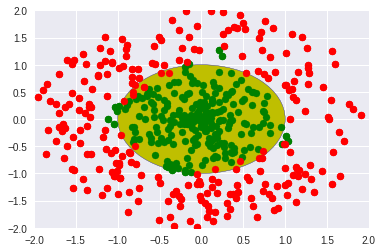

In [62]:
print_model(model2,testx)

In [59]:
model3 = generate_single_hidden_MLP(2) 
training_routine(model3,dataset,10000,gpu)

Using CPU
At iteration 0
Training loss : 0.86396515
Training accuracy : 0.5035
Validation loss : 0.8452978
Validation accuracy : 0.528
At iteration 100
Training loss : 0.7457385
Training accuracy : 0.5035
Validation loss : 0.7345665
Validation accuracy : 0.528
At iteration 200
Training loss : 0.6985501
Training accuracy : 0.4811
Validation loss : 0.6927115
Validation accuracy : 0.496
At iteration 300
Training loss : 0.67594385
Training accuracy : 0.4183
Validation loss : 0.67345244
Validation accuracy : 0.442
At iteration 400
Training loss : 0.6628801
Training accuracy : 0.3542
Validation loss : 0.66265297
Validation accuracy : 0.376
At iteration 500
Training loss : 0.65406895
Training accuracy : 0.5862
Validation loss : 0.6555081
Validation accuracy : 0.564
At iteration 600
Training loss : 0.64759135
Training accuracy : 0.5983
Validation loss : 0.65024763
Validation accuracy : 0.568
At iteration 700
Training loss : 0.6424451
Training accuracy : 0.6065
Validation loss : 0.6461449
Valid

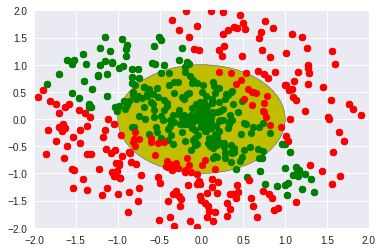

In [63]:
print_model(model3,testx)